# Hot-Dog Classifier

### References
* Data Set: https://www.kaggle.com/dansbecker/hot-dog-not-hot-dog/data
* Keras Image Classification Tutorial: https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
* HBO Silicon Valley Video: https://www.youtube.com/watch?v=pqTntG1RXSY

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

%matplotlib inline

import os 
import glob

In [64]:
from keras.preprocessing.image import load_img, array_to_img, img_to_array, ImageDataGenerator
from IPython.display import Image 
import random

## Data Loading

In [11]:
def get_data_path(data_set="train", label="hot_dog"):
    data_folder = "data"
    path = os.path.join(data_folder, data_set, label, "")
    return path
    
#def get_image_list(path)#

In [57]:
# get all paths to the image files
train_hot_dog_paths = glob.glob(get_data_path("train", "hot_dog") + "*")
train_not_hot_dog_paths = glob.glob(get_data_path("train", "not_hot_dog") + "*")
test_hot_dog_paths = glob.glob(get_data_path("test", "hot_dog") + "*")
test_not_hot_dog_paths = glob.glob(get_data_path("test", "not_hot_dog") + "*")

data_list_all = [train_hot_dog_paths, train_not_hot_dog_paths, test_hot_dog_paths, test_not_hot_dog_paths]
data_list_all_str = ["train_hot_dog_paths", "train_not_hot_dog_paths", "test_hot_dog_paths", "test_not_hot_dog_paths"]

In [58]:
for descr, path in zip(data_list_all_str, data_list_all):
    print(f"{descr}: number_of_obersvations={len(path)}")
    

train_hot_dog_paths: number_of_obersvations=249
train_not_hot_dog_paths: number_of_obersvations=249
test_hot_dog_paths: number_of_obersvations=250
test_not_hot_dog_paths: number_of_obersvations=250


## Data Exploration

In [65]:
def visualize_images(data_path, n=3):
    # visualize n random images from the data_path folder
    num_images = len(data_path)
    idx_list = [j for j in range(num_images)]

    for k in range(0,n):
        idx = random.sample(idx_list, 1)[0]
        img_path = data_path[idx]
        img = load_img(img_path, target_size=(200,200))
        print(img_to_array(img).shape)
        display(img)


(200, 200, 3)


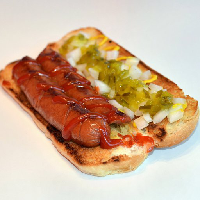

(200, 200, 3)


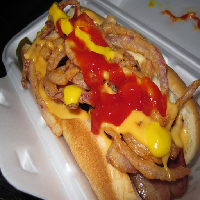

In [66]:
visualize_images(train_hot_dog_paths, 2)

(200, 200, 3)


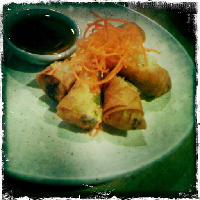

(200, 200, 3)


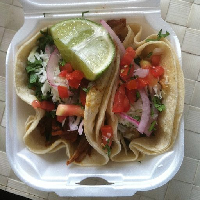

In [67]:
visualize_images(train_not_hot_dog_paths, 2)

## Data Preparation

In [79]:
IMG_SIZE = 150
CHANNELS = 3

In [80]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [81]:
train_generator = train_generator

In [82]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)


In [83]:
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(IMG_SIZE, IMG_SIZE),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=batch_size,
        class_mode='binary')

Found 501 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Training

In [86]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization

In [104]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, CHANNELS)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation = 'sigmoid'))

In [105]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [106]:
BATCH_SIZE = 16

In [107]:
model.fit_generator(
    train_generator,
    steps_per_epoch = 2000 // BATCH_SIZE,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 800 // BATCH_SIZE
)
model.save_weights("first_try.h5")

Epoch 1/20
125/125 [==============================] - 37s 295ms/step - loss: 0.6914 - accuracy: 0.6033 - val_loss: 0.6385 - val_accuracy: 0.5495
Epoch 2/20
125/125 [==============================] - 68s 548ms/step - loss: 0.6065 - accuracy: 0.6695 - val_loss: 0.5343 - val_accuracy: 0.6727
Epoch 3/20
125/125 [==============================] - 45s 358ms/step - loss: 0.5437 - accuracy: 0.7285 - val_loss: 0.6110 - val_accuracy: 0.6168
Epoch 4/20
125/125 [==============================] - 45s 357ms/step - loss: 0.4265 - accuracy: 0.8047 - val_loss: 0.7732 - val_accuracy: 0.6070
Epoch 5/20
125/125 [==============================] - 43s 344ms/step - loss: 0.3782 - accuracy: 0.8236 - val_loss: 0.6101 - val_accuracy: 0.5939
Epoch 6/20
125/125 [==============================] - 49s 391ms/step - loss: 0.3193 - accuracy: 0.8653 - val_loss: 1.1762 - val_accuracy: 0.6572
Epoch 7/20
125/125 [==============================] - 48s 381ms/step - loss: 0.2557 - accuracy: 0.8942 - val_loss: 0.6734 - val_ac

## Evaluation

In [110]:
test_data_paths = test_hot_dog_paths + test_not_hot_dog_paths

In [132]:
img = load_img(test_data_paths[1])

In [133]:
X_test, y_test = validation_generator.next()

In [134]:
probs = model.predict(batch[0])

In [139]:
preds = (probs > 0.5).astype(int).ravel()

In [140]:
preds

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

In [141]:
y_test

array([0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.],
      dtype=float32)

In [144]:
acc = np.mean(preds==y_test)
print(f"accuracy {acc}")

accuracy 0.75


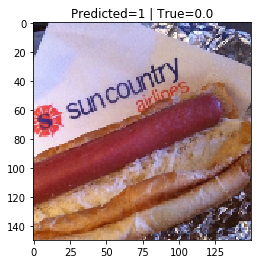

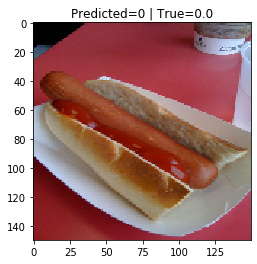

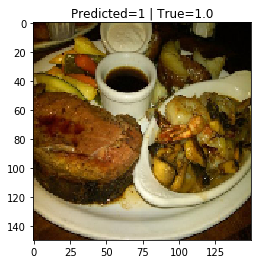

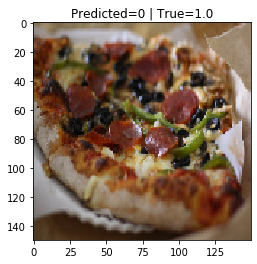

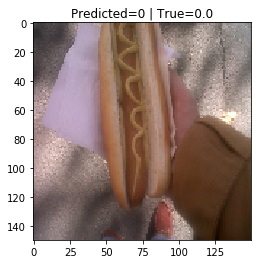

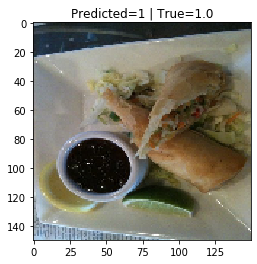

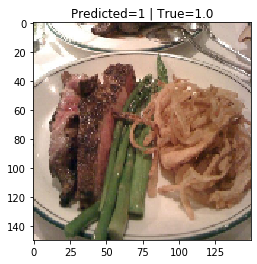

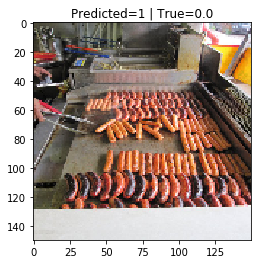

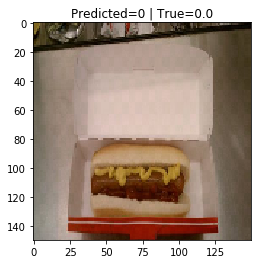

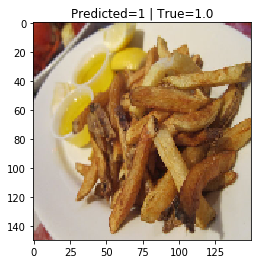

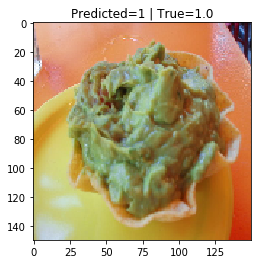

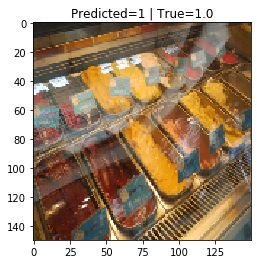

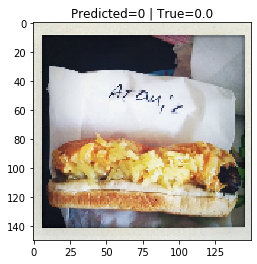

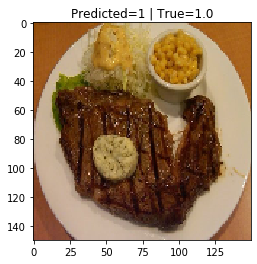

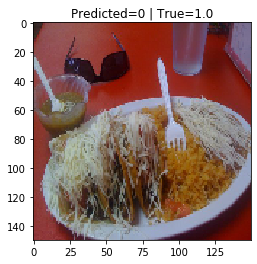

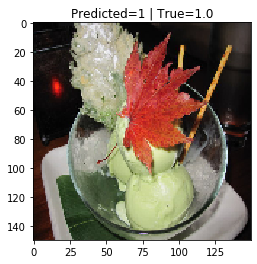

In [146]:
for X, y_true, y_hat in zip(X_test, y_test, preds):
    plt.figure()
    plt.imshow(X)
    plt.title(f"Predicted={y_hat} | True={y_true}")

## Conclusion

The model seems to overfit. During the training process we see high training accuracy while having very low validation accuracy.
Ways to improve:

* Hyperparameter Tuning Using Cross-Validation
* Acquire more data
* Stronger Regularization (Dropout/Batchnorm)
* Simpler / more shallow architecture
